In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
import sys
import PIL

In [2]:
%matplotlib inline
numpy.set_printoptions(threshold=sys.maxsize)

In [3]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
    
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [5]:
training_data_file = open("C:/Users/mikha/neural-network/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [6]:
def load(filename):
    return (numpy.array(PIL.Image.open(filename).getdata()).reshape(1, 28 * 28) / -255.0 + 1.0) * 0.99 + 0.01

In [7]:
epochs = 5

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01

        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [8]:
test_data_file = open("C:/Users/mikha/neural-network/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [9]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

In [10]:
scorecard_array = numpy.asfarray(scorecard)
print("Эффективность равна", scorecard_array.sum() / scorecard_array.size * 100, "%")

Эффективность равна 97.46000000000001 %


Ответ нейронной сети: 0


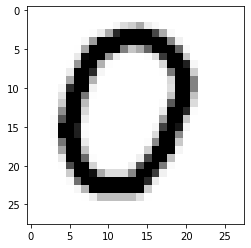

In [12]:
inputs = load("C:/Users/mikha/neural-network/0.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 1


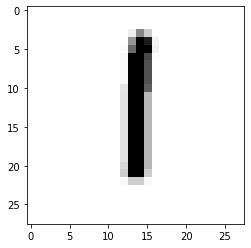

In [13]:
inputs = load("C:/Users/mikha/neural-network/1.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 2


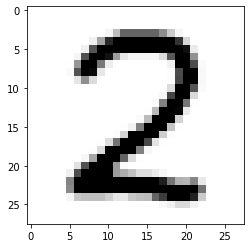

In [14]:
inputs = load("C:/Users/mikha/neural-network/2.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 3


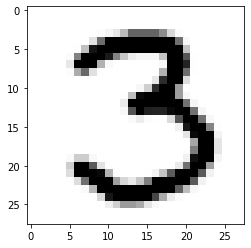

In [15]:
inputs = load("C:/Users/mikha/neural-network/3.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 4


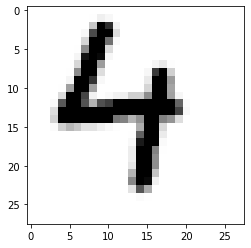

In [16]:
inputs = load("C:/Users/mikha/neural-network/4.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 5


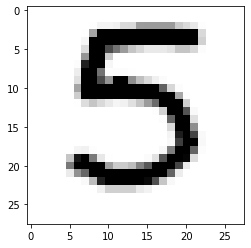

In [17]:
inputs = load("C:/Users/mikha/neural-network/5.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 8


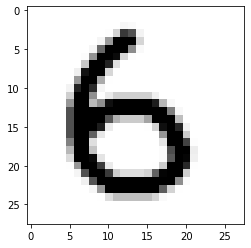

In [18]:
inputs = load("C:/Users/mikha/neural-network/6.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 2


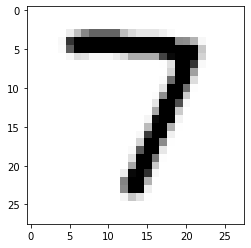

In [19]:
inputs = load("C:/Users/mikha/neural-network/7.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 8


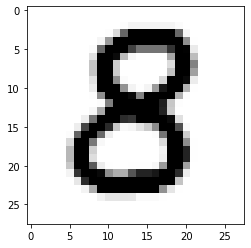

In [20]:
inputs = load("C:/Users/mikha/neural-network/8.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)

Ответ нейронной сети: 9


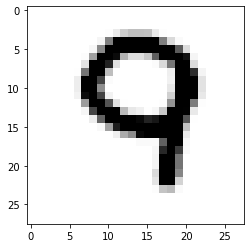

In [21]:
inputs = load("C:/Users/mikha/neural-network/9.png")
outputs = n.query(inputs)
label = numpy.argmax(outputs)
image_array = numpy.asfarray(inputs).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
print("Ответ нейронной сети:", label)